In [17]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('white')

In [2]:
df=pd.read_csv('Flight data-2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


This is a regression problem where we are trying to predict Flight delay based on various features. Some algorithms that do well here are Random Forest Regression, Gradient Boost regression etc..

In [3]:
# Dropping the column cancellationcode since not associated with arrdelay our outcome variable
# Data Clean up
df.isnull().sum()
df.drop('CancellationCode', inplace=True, axis=1)
df.dropna(inplace=True)
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

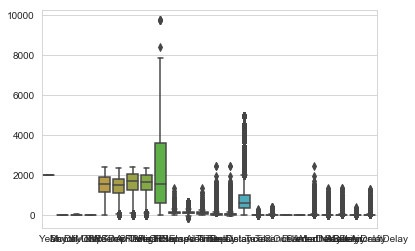

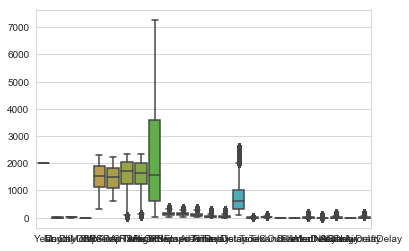

In [4]:
# Winsorising the outliers
# Box plot before winsorizing
sns.set_style("whitegrid")
g=sns.boxplot(data=df)
plt.show()

for columns in df:
    stats.mstats.winsorize(df[columns], inplace=True, limits = [0.01, 0.01])

# Box plot after winsorizing

sns.set_style("whitegrid")
g=sns.boxplot(data=df)
plt.show()

In [5]:
# Adding a feature of outcome variable so that only 30mins and more is considered a delay
df['Arr_delay_beyond_30m']=np.where(df['ArrDelay']<30, 0, df['ArrDelay'])

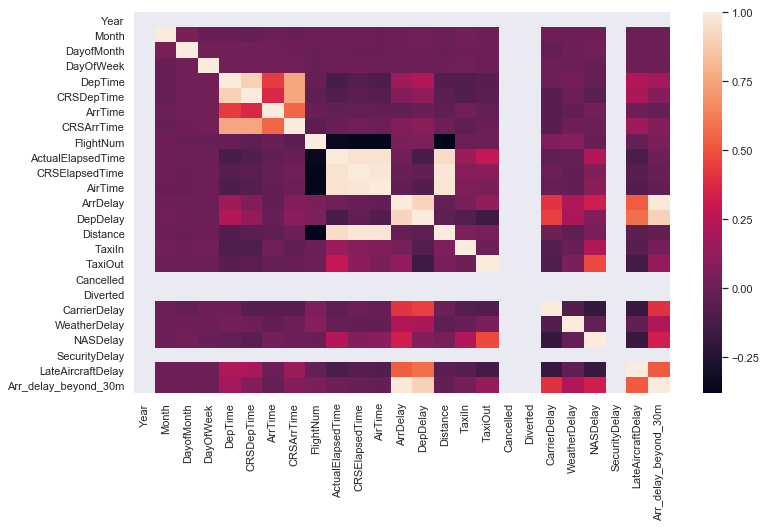

In [6]:
# Sub-sampling of data for lesser runtime
df=df.sample(frac=0.01, replace=True, random_state=1)


# Heat map
num_datatype=df.select_dtypes(exclude=["category","bool_","object_"])
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(num_datatype.corr())
plt.show()

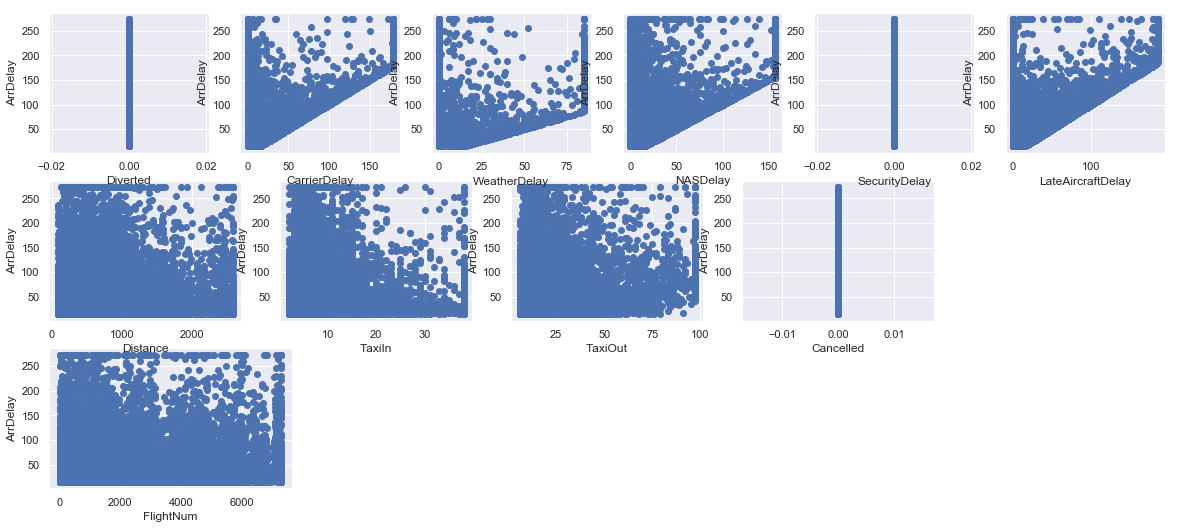

In [7]:
# Scatter plot to see the spread of the X variables in relation to outcome variable Y
plt.figure(figsize=(20,18))
x=4
y=1
for i in range(0, 24):
    plt.subplot(6,x,y)
    plt.scatter(num_datatype.iloc[:, i], num_datatype['ArrDelay'])
    plt.xlabel(num_datatype.columns[i])
    plt.ylabel('ArrDelay')
    y=y+1
    if (y==10):
        x+=1
        y=1
plt.show()

In [8]:
Y=df.ArrDelay
X=df.loc[:, ~(df.columns).isin(['ArrDelay'])]
X=X.select_dtypes(exclude=["category","bool_","object_"])

In [20]:
#Data split to Train and test
global X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

def model(mod):
    model_object=mod
    model_object.fit(X_train, y_train)
    evaluation_continuous(model_object)
    return 

def evaluation_continuous(model_object):
    #Evalution of model
    score=cross_val_score(X=X_test, y=y_test, estimator=model_object, cv=10)
    print("\nAccuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    
    # Calculate the error, also called the residual.
    
    actual=y_test
    predicted=model_object.predict(X_test)
    residual = actual - predicted
    print ('\nThe Root Mean Squared Error is ', np.sqrt(mean_squared_error(actual, predicted)))
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    return
    

### Random Forest Regression

C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Accuracy: 1.00 (+/- 0.00)
The Root Mean Squared Error is  0.6587976232699031


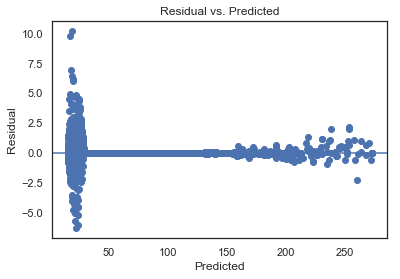

In [21]:
model(ensemble.RandomForestRegressor())

The residual plot appears to do well expect that very little variance in the error. This is the lowest error seen compared to all models.

### Gradient Boost Regression


Accuracy: 1.00 (+/- 0.00)
The Root Mean Squared Error is  1.4916509679602266


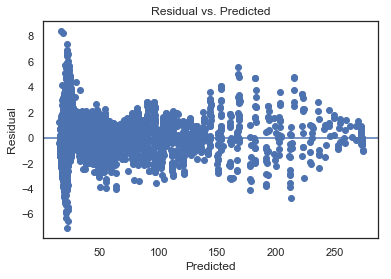

In [22]:
params = {'n_estimators': 500,
          'max_depth': 2}
model(ensemble.GradientBoostingRegressor(**params))

### Lasso Logistic Regression

C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa


Accuracy: 0.99 (+/- 0.01)
The Root Mean Squared Error is  4.221964387893274


C:\Users\nagad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


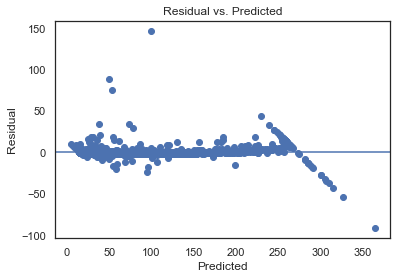

In [23]:
model(linear_model.Lasso(alpha=.35))

Random Forest regressor and Gradient Boost Regressor appear to be having low on errors with approx.equal accuracies.